In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
 df = pd.read_csv("zomato.csv",encoding="latin-1")

In [32]:
#About the data
df.head()
df.shape
df.describe()
df.isnull().sum()
df.isnull().sum().sum()
df.isnull().any()

Restaurant ID           False
Restaurant Name         False
Country Code            False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                 True
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Switch to order menu    False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
dtype: bool

In [18]:
## data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [23]:
## Identify nullValues
[features for features  in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<Axes: >

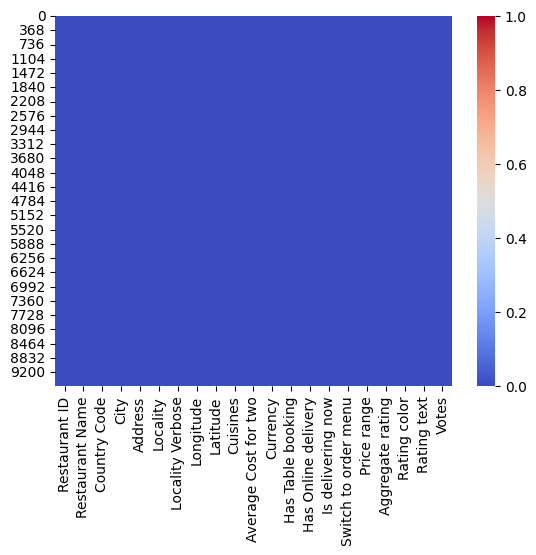

In [36]:
sns.heatmap(df.isnull(),cmap="coolwarm")

In [39]:
df_country= pd.read_excel("Country-Code.xlsx")

In [40]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [41]:
df_country.shape

(15, 2)

In [42]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


In [45]:
df_country.columns

Index(['Country Code', 'Country'], dtype='object')

In [48]:
df_final=pd.merge(df,df_country,on="Country Code",how="left")

In [69]:
df_final.dtypes
df_final['Country'].value_counts()
df_final.groupby("Country")["Aggregate rating"].size()

Country
Australia           24
Brazil              60
Canada               4
India             8652
Indonesia           21
New Zealand         40
Phillipines         22
Qatar               20
Singapore           20
South Africa        60
Sri Lanka           20
Turkey              34
UAE                 60
United Kingdom      80
United States      434
Name: Aggregate rating, dtype: int64

In [78]:
df_numerical = df_final.select_dtypes(include=['int64','float64'])
df_categorical = df_final.select_dtypes(exclude=['int64','float64'])

In [70]:
df_final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [91]:
ratings=df_final.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [97]:
plt.rcParams['figure.figsize']=(12,6)
ratings['Rating color'].unique()

array(['White', 'Red', 'Orange', 'Yellow', 'Green', 'Dark Green'],
      dtype=object)

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

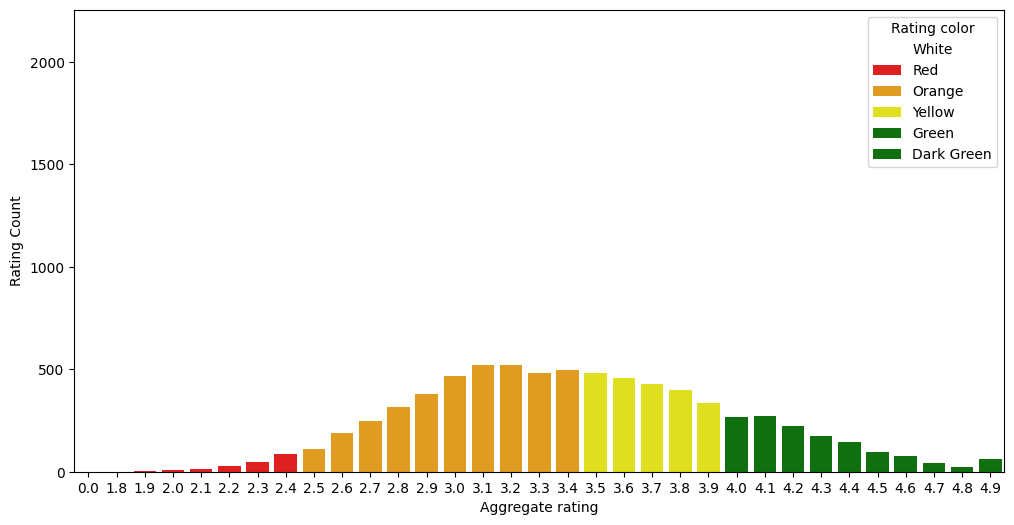

In [105]:
sns.barplot(x='Aggregate rating', y='Rating Count',data=ratings,hue= 'Rating color',palette=['White', 'Red', 'Orange', 'Yellow', 'green', 'Green'])

In [106]:
### Find the countries name that has given 0 rating
df_final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [109]:
df_final[['Country','Aggregate rating']]

,Country,Aggregate rating
0,Phillipines,4.8
1,Phillipines,4.5
2,Phillipines,4.4
3,Phillipines,4.9
4,Phillipines,4.8
...,...,...
9546,Turkey,4.1
9547,Turkey,4.2
9548,Turkey,3.7
9549,Turkey,4.0


In [119]:
pd.set_option('display.max_rows', None)
df_final.groupby(['Country','Aggregate rating']).size()

Country         Aggregate rating
Australia       2.4                    1
                2.6                    1
                2.9                    1
                3.2                    1
                3.4                    1
                3.5                    3
                3.6                    3
                3.7                    3
                3.8                    4
                4.1                    3
                4.4                    2
                4.6                    1
Brazil          0.0                    5
                3.0                    1
                3.1                    3
                3.2                    2
                3.3                    1
                3.4                    1
                3.5                    1
                3.6                    3
                3.7                    3
                3.8                    2
                3.9                    2
                4.0     

In [135]:
filter_df=df_final[df_final['Aggregate rating'] == 0]

In [137]:
filter_df.groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [139]:
##find out which currency is used by which country?
df_final.groupby(['Country','Currency']).size()

Country         Currency              
Australia       Dollar($)                   24
Brazil          Brazilian Real(R$)          60
Canada          Dollar($)                    4
India           Indian Rupees(Rs.)        8652
Indonesia       Indonesian Rupiah(IDR)      21
New Zealand     NewZealand($)               40
Phillipines     Botswana Pula(P)            22
Qatar           Qatari Rial(QR)             20
Singapore       Dollar($)                   20
South Africa    Rand(R)                     60
Sri Lanka       Sri Lankan Rupee(LKR)       20
Turkey          Turkish Lira(TL)            34
UAE             Emirati Diram(AED)          60
United Kingdom  Pounds(£)                  80
United States   Dollar($)                  434
dtype: int64

In [144]:
df_final[['Country','Currency']].drop_duplicates().reset_index()

,index,Country,Currency
0,0,Phillipines,Botswana Pula(P)
1,22,Brazil,Brazilian Real(R$)
2,82,United States,Dollar($)
3,102,Australia,Dollar($)
4,185,Canada,Dollar($)
5,456,Singapore,Dollar($)
6,564,UAE,Emirati Diram(AED)
7,624,India,Indian Rupees(Rs.)
8,9276,Indonesia,Indonesian Rupiah(IDR)
9,9297,New Zealand,NewZealand($)


In [151]:
## Which Countries do have online deliveries option
filter=df_final[df_final["Has Online delivery"]=='Yes']
filter.groupby('Country').size()

Country
India    2423
UAE        28
dtype: int64

In [157]:
## Create a pie chart for top 5 cities distribution based on their number of orders

df_final['City'].value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', name='City', length=141)

([<matplotlib.patches.Wedge at 0x302d1b110>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

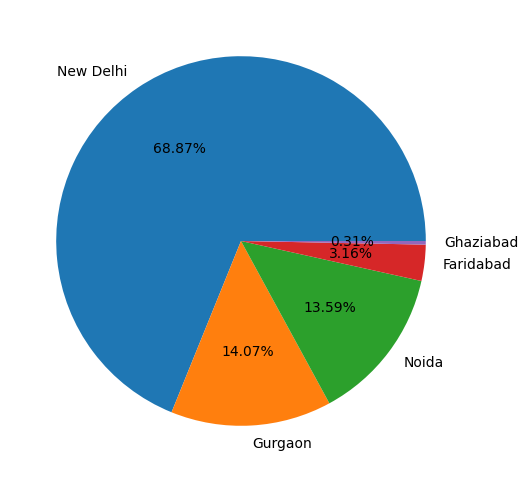

In [160]:
city_value=df_final['City'].value_counts().values
city_index= df_final['City'].value_counts().index
plt.pie(city_value[:5],labels=city_index[:5],autopct='%1.2f%%')

In [167]:
## Find top 10 cuisines 

top_cusisines = df_final['Cuisines'].value_counts()
top_cusisines= top_cusisines.reset_index().rename(columns={0:'count'})
print(top_cusisines)

                                               Cuisines  count
0                                          North Indian    936
1                                 North Indian, Chinese    511
2                                               Chinese    354
3                                             Fast Food    354
4                                 North Indian, Mughlai    334
5                                                  Cafe    299
6                                                Bakery    218
7                        North Indian, Mughlai, Chinese    197
8                                      Bakery, Desserts    170
9                                           Street Food    149
10                                     Pizza, Fast Food    131
11                                   Chinese, Fast Food    118
12                                  Mithai, Street Food    116
13                                         South Indian    112
14                                    Bakery, Fast Food

/var/folders/vh/2wyvmlxx17zd1ndbv6b46qlw0000gp/T/ipykernel_3452/169331212.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cuisines', y='count', data=top_cusisines[:10] , palette=['green'])
/var/folders/vh/2wyvmlxx17zd1ndbv6b46qlw0000gp/T/ipykernel_3452/169331212.py:1: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Cuisines', y='count', data=top_cusisines[:10] , palette=['green'])


<Axes: xlabel='Cuisines', ylabel='count'>

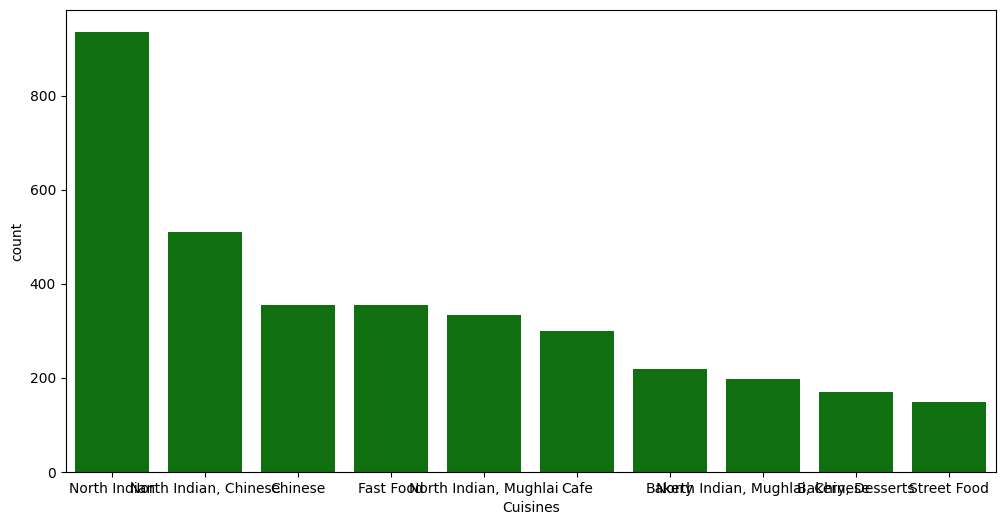

In [181]:
sns.barplot(x='Cuisines', y='count', data=top_cusisines[:10] , palette=['green'])